In [1]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 991.0 kB/s eta 0:00:01
   -------------- ------------------------- 102.4/282.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [7]:
dataset=pd.read_csv(r"C:\Users\salah\OneDrive\Desktop\Alphabets_data.csv")

In [9]:

dataset.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [11]:
# shape
print(dataset.shape)

(20000, 17)


In [13]:
# Generate various summary statistics
print(dataset.describe())

               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [15]:
# class distribution
print(dataset.groupby('letter').size())

letter
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64


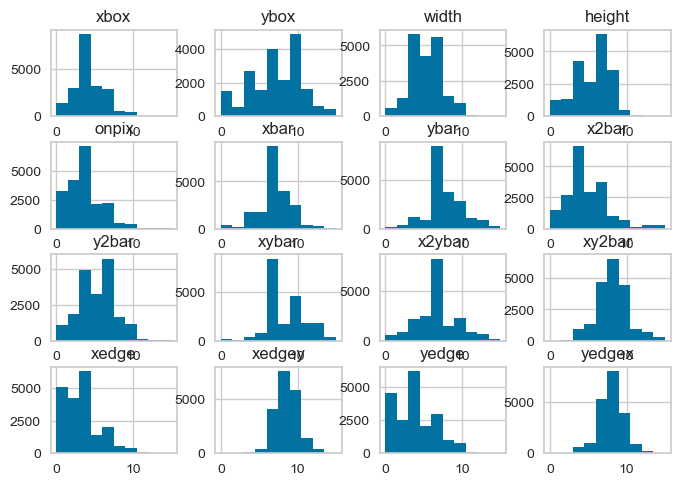

In [17]:
# histograms
dataset.hist()
plt.show()

In [19]:
array = dataset.values

In [92]:
X = array[:, 1:17]
Y = array[:, 0]

In [94]:
print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', Y.shape)

X matrix dimensionality: (20000, 16)
Y vector dimensionality: (20000,)


In [96]:
# split the data into a training set and a test set
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.20,random_state=10, stratify=Y)
     

In [98]:
print("X_train: ", X_train.shape)
print("X_validation: ", X_validation.shape)
print("Y_train: ", Y_train.shape)
print("Y_validation: ", Y_validation.shape)

X_train:  (16000, 16)
X_validation:  (4000, 16)
Y_train:  (16000,)
Y_validation:  (4000,)


In [100]:
dec_tree = DecisionTreeClassifier()

In [102]:
cm = ConfusionMatrix(dec_tree, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.87475

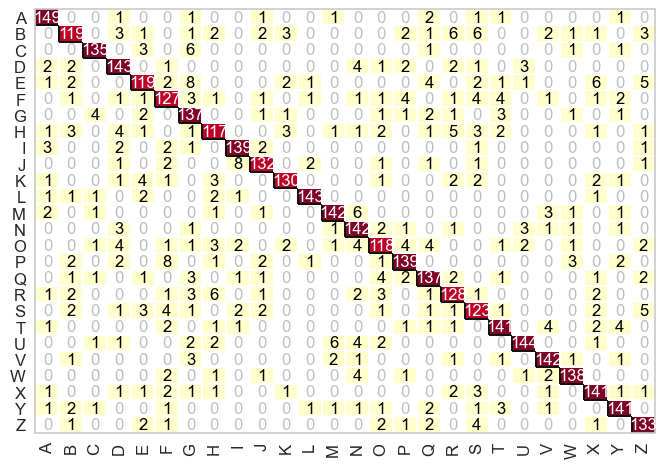

In [104]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [106]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [108]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.87475


In [110]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[149   0   0   1   0   0   1   0   0   1   0   0   1   0   0   0   2   0
    1   1   0   0   0   0   1   0]
 [  0 119   0   3   1   0   1   2   0   2   3   0   0   0   0   2   1   6
    6   0   0   2   1   1   0   3]
 [  0   0 135   0   3   0   6   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   1   0   1   0]
 [  2   2   0 143   0   1   0   0   0   0   0   0   0   4   1   2   0   2
    1   0   3   0   0   0   0   0]
 [  1   2   0   0 119   2   8   0   0   0   2   1   0   0   0   0   4   0
    2   1   1   0   0   6   0   5]
 [  0   1   0   1   1 127   3   1   0   1   0   1   0   1   1   4   0   1
    4   4   0   1   0   1   2   0]
 [  0   0   4   0   2   0 137   0   0   1   1   0   0   0   1   1   2   1
    0   3   0   0   1   0   1   0]
 [  1   3   0   4   1   0   1 117   0   0   3   0   1   1   2   0   1   5
    3   2   0   0   0   1   0   1]
 [  3   0   0   2   0   2   1   0 139   2   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   1]
 [  0   0   0   1  

In [112]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.90854   0.94304   0.92547       158
           B    0.85612   0.77778   0.81507       153
           C    0.93103   0.91837   0.92466       147
           D    0.85119   0.88820   0.86930       161
           E    0.85000   0.77273   0.80952       154
           F    0.80892   0.81935   0.81410       155
           G    0.79191   0.88387   0.83537       155
           H    0.82979   0.79592   0.81250       147
           I    0.90260   0.92053   0.91148       151
           J    0.89796   0.88591   0.89189       149
           K    0.91549   0.87838   0.89655       148
           L    0.95973   0.94079   0.95017       152
           M    0.91613   0.89873   0.90735       158
           N    0.83529   0.90446   0.86850       157
           O    0.83688   0.78146   0.80822       151
           P    0.87975   0.86335   0.87147       161
           Q    0.85625   0.87261   0.86435       157
           R    0.83660   0

## Gaussian Naive Bayes

In [114]:
from sklearn.naive_bayes import GaussianNB
gaussianNB= GaussianNB()

In [116]:
cm = ConfusionMatrix(gaussianNB, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))
     

0.64175

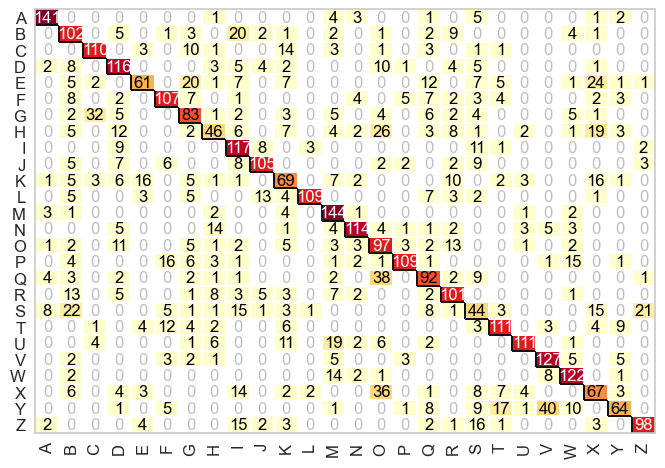

In [118]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [120]:

# predict the responses for test dataset
predictions = cm.predict(X_validation)

In [122]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.64175


In [124]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[141   0   0   0   0   0   0   1   0   0   0   0   4   3   0   0   1   0
    5   0   0   0   0   1   2   0]
 [  0 102   0   5   0   1   3   0  20   2   1   0   2   0   1   0   2   9
    0   0   0   0   4   1   0   0]
 [  0   0 110   0   3   0  10   1   0   0  14   0   3   0   1   0   3   0
    1   1   0   0   0   0   0   0]
 [  2   8   0 116   0   0   0   3   5   4   2   0   0   0  10   1   0   4
    5   0   0   0   0   1   0   0]
 [  0   5   2   0  61   0  20   1   7   0   7   0   0   0   0   0  12   0
    7   5   0   0   1  24   1   1]
 [  0   8   0   2   0 107   7   0   1   0   0   0   0   4   0   5   7   2
    3   4   0   0   0   2   3   0]
 [  0   2  32   5   0   0  83   1   2   0   3   0   5   0   4   0   6   2
    4   0   0   0   5   1   0   0]
 [  0   5   0  12   0   0   2  46   6   0   7   0   4   2  26   0   3   8
    1   0   2   0   1  19   3   0]
 [  0   0   0   9   0   0   0   0 117   8   0   3   0   0   0   0   0   0
   11   1   0   0   0   0   0   2]
 [  0   5   0   7  

In [126]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.87037   0.89241   0.88125       158
           B    0.51000   0.66667   0.57790       153
           C    0.72368   0.74830   0.73579       147
           D    0.61053   0.72050   0.66097       161
           E    0.64894   0.39610   0.49194       154
           F    0.69032   0.69032   0.69032       155
           G    0.52866   0.53548   0.53205       155
           H    0.49462   0.31293   0.38333       147
           I    0.53670   0.77483   0.63415       151
           J    0.75000   0.70470   0.72664       149
           K    0.47586   0.46622   0.47099       148
           L    0.94783   0.71711   0.81648       152
           M    0.64000   0.91139   0.75196       158
           N    0.83212   0.72611   0.77551       157
           O    0.42731   0.64238   0.51323       151
           P    0.87200   0.67702   0.76224       161
           Q    0.57500   0.58599   0.58044       157
           R    0.63125   0

## KNN Classifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [131]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)

In [133]:
cm = ConfusionMatrix(knn, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.96475

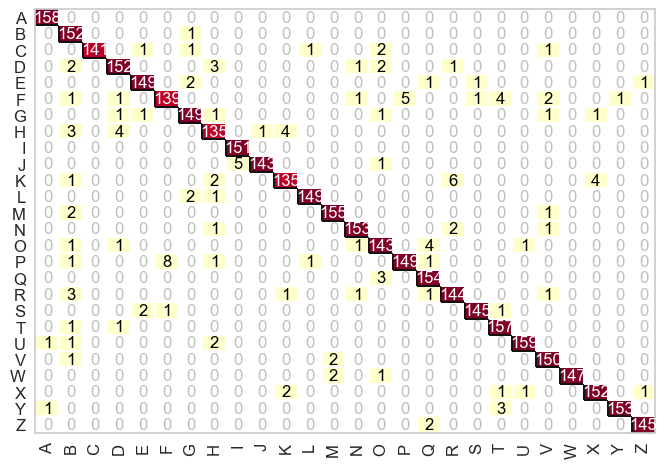

In [135]:
# train the model using the training sets
cm.fit(X_train, Y_train)

cm.score(X_validation, Y_validation)

In [137]:
# predict the responses for test dataset
predictions = cm.predict(X_validation)
     

In [139]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.96475


In [141]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 152   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 141   0   1   0   1   0   0   0   0   1   0   0   2   0   0   0
    0   0   0   1   0   0   0   0]
 [  0   2   0 152   0   0   0   3   0   0   0   0   0   1   2   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 149   0   2   0   0   0   0   0   0   0   0   0   1   0
    1   0   0   0   0   0   0   1]
 [  0   1   0   1   0 139   0   0   0   0   0   0   0   1   0   5   0   0
    1   4   0   2   0   0   1   0]
 [  0   0   0   1   1   0 149   1   0   0   0   0   0   0   1   0   0   0
    0   0   0   1   0   1   0   0]
 [  0   3   0   4   0   0   0 135   0   1   4   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [143]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.98750   1.00000   0.99371       158
           B    0.89941   0.99346   0.94410       153
           C    1.00000   0.95918   0.97917       147
           D    0.95000   0.94410   0.94704       161
           E    0.97386   0.96753   0.97068       154
           F    0.93919   0.89677   0.91749       155
           G    0.96129   0.96129   0.96129       155
           H    0.92466   0.91837   0.92150       147
           I    0.96795   1.00000   0.98371       151
           J    0.99306   0.95973   0.97611       149
           K    0.95070   0.91216   0.93103       148
           L    0.98675   0.98026   0.98350       152
           M    0.97484   0.98101   0.97792       158
           N    0.97452   0.97452   0.97452       157
           O    0.93464   0.94702   0.94079       151
           P    0.96753   0.92547   0.94603       161
           Q    0.94479   0.98089   0.96250       157
           R    0.94118   0

In [145]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

## ANN

In [148]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scalar = scaler.fit(X)

In [152]:
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)

In [154]:
mlp = MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')

In [156]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.969

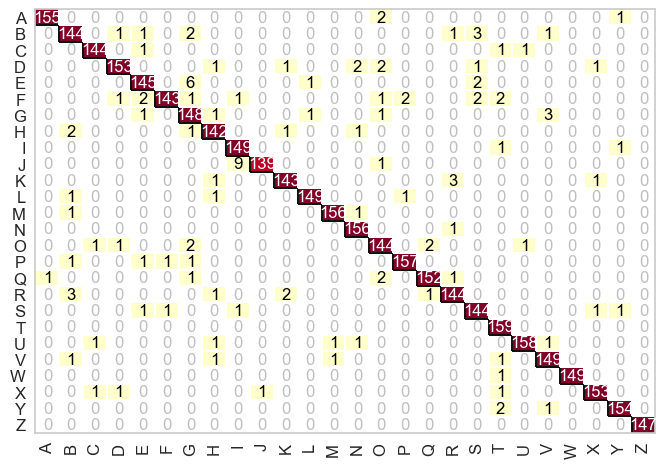

In [158]:
# train the model using the training sets
cm.fit(X_train, Y_train)
cm.score(X_validation, Y_validation)

In [160]:
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_validation, predictions))

Accuracy:  0.96475


In [162]:
# compute confusion matrix
print(confusion_matrix(Y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 152   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 141   0   1   0   1   0   0   0   0   1   0   0   2   0   0   0
    0   0   0   1   0   0   0   0]
 [  0   2   0 152   0   0   0   3   0   0   0   0   0   1   2   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 149   0   2   0   0   0   0   0   0   0   0   0   1   0
    1   0   0   0   0   0   0   1]
 [  0   1   0   1   0 139   0   0   0   0   0   0   0   1   0   5   0   0
    1   4   0   2   0   0   1   0]
 [  0   0   0   1   1   0 149   1   0   0   0   0   0   0   1   0   0   0
    0   0   0   1   0   1   0   0]
 [  0   3   0   4   0   0   0 135   0   1   4   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [164]:
# text report showing the main classification metrics
print(classification_report(Y_validation, predictions, digits=5))

              precision    recall  f1-score   support

           A    0.98750   1.00000   0.99371       158
           B    0.89941   0.99346   0.94410       153
           C    1.00000   0.95918   0.97917       147
           D    0.95000   0.94410   0.94704       161
           E    0.97386   0.96753   0.97068       154
           F    0.93919   0.89677   0.91749       155
           G    0.96129   0.96129   0.96129       155
           H    0.92466   0.91837   0.92150       147
           I    0.96795   1.00000   0.98371       151
           J    0.99306   0.95973   0.97611       149
           K    0.95070   0.91216   0.93103       148
           L    0.98675   0.98026   0.98350       152
           M    0.97484   0.98101   0.97792       158
           N    0.97452   0.97452   0.97452       157
           O    0.93464   0.94702   0.94079       151
           P    0.96753   0.92547   0.94603       161
           Q    0.94479   0.98089   0.96250       157
           R    0.94118   0

In [168]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

## Hyper Parameter Tuning

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Define the model
model = MLPClassifier()

# Define the hyperparameters and their values
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Best Score: 0.9406251206223448
